## ДЗ 01 ML_business

**Задание:**

1. Выберите наборы данных. которые можно интерпретировать, как временные ряды:

а) зависимость цены на недвижимость в конкретном регионе от времени,

б) скорость полета самолета при перелете из аэропорта А в аэропорт В,

в) количество отказов компьютера, г) число обращений в поликлинику по району,

д) координаты автобуса при движении по маршруту,

е) координаты фигуры нарушителя в файле видеофиксации охранной системы.

2. Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

3. Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

4. Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

5. Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.

p.s. полезно будет почитать в официальной документации к pandas про метод resample (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html)


In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

/Users/artem/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Задание 1

Выберите наборы данных. которые можно интерпретировать, как временные ряды:

Правильный ответ выделен жирным шрифтом, а вообще, если в каждый из вариантов дописать "на временной шкале" или "по дням" ("по часам" и т.д.), то из каждого варианта получится временной ряд

**а) зависимость цены на недвижимость в конкретном регионе от времени,**

б) скорость полета самолета при перелете из аэропорта А в аэропорт В,

в) количество отказов компьютера,

г) число обращений в поликлинику по району,

д) координаты автобуса при движении по маршруту,

е) координаты фигуры нарушителя в файле видеофиксации охранной системы.

### Задание 2

Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [2]:
cd /Users/artem/Movies/ML_buisness_course/lesson1

/Users/artem/Movies/ML_buisness_course/lesson1


Загружаем датасет:

In [3]:
df = pd.read_csv('DUQ_hourly.csv', index_col =[0], parse_dates=[0])
df.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


Предварительный осмотр на пропуски:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   DUQ_MW  119068 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


#### проверка, можно ли привести значения к типу int

Создадим столбец, куда скопируем исходные данные, но назначим им формат "int64"

In [5]:
df['check_int']=df['DUQ_MW'].astype('int64')

Проверим, равна ли сумма двух столбцов:

In [6]:
df['check_int'].sum() == df['DUQ_MW'].sum()

True

Сумма столбца 'float64' и сумма столбца 'int64' равны, значит, цифры не содержат дробных частей, удалим проверочный столбец и приведём данные к типу 'int64':

In [7]:
df['DUQ_MW'] = df['DUQ_MW'].astype('int64')

In [8]:
df = df.drop(columns=['check_int'])
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   DUQ_MW  119068 non-null  int64
dtypes: int64(1)
memory usage: 1.8 MB


смешно, но назначением типа данных 'int64' размер датасета уменьшить не удалось

#### проверка на выбросы

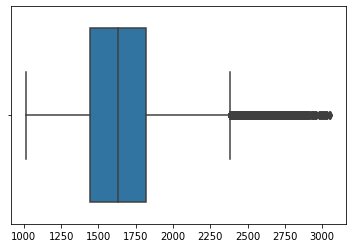

In [9]:
sns.boxplot(df.values)

### Предварительное описание ряда данных

* Мы имеем числовой ряд данных (целые числа)
* Пропусков нет
* Выбросов нет
* Интервал изменения индексов (дата) в диапазоне от 2005-12-31 01:00:00 до 2018-01-02 00:00:00
* Шаг измерения составляет один час
* Общий объем данных составляет 119068 значений
* тип измеряемой информации float64, переделан на int64

### Графическое описание данных

Text(0, 0.5, 'МВт')

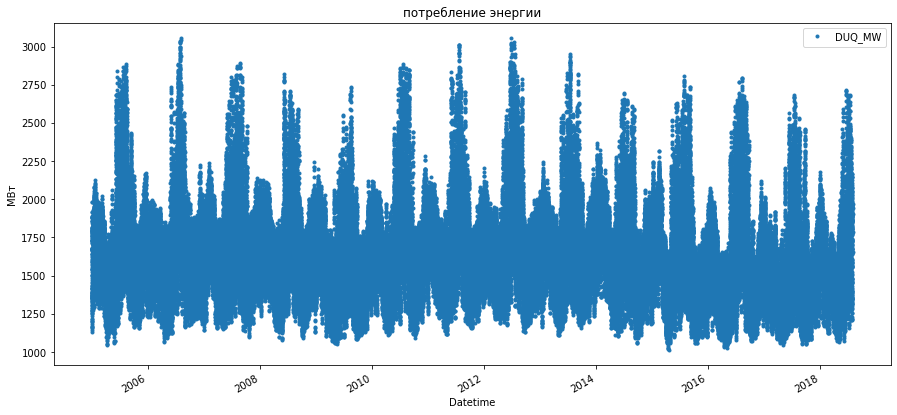

In [10]:
df.plot( style = '.', figsize = ( 15, 7 ), title = 'потребление энергии' )
plt.ylabel ( 'МВт' )

### Обсуждение визуализации

* На графике пропусков также не наблюдается
* Визуальный анализ показывает что:
    * Предъявленные данные имеют циклы
    * можно увидеть два цикла - с большей амплитудой колебания и с меньшей, которые сменяют друг друга

### Задание 3

Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам

In [11]:
df = pd.read_excel('brent_2010-2019.xlsx', index_col=[0], parse_dates=[0])
df.head()

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


Сразу видно, что данные имеют обратную сортировку - последние наблюдения вверху, а ранние - внизу, это надо переделать для удобства

In [12]:
df = df.sort_index()

Даты из индекса скопируем в новый столбец, чтобы из неё впоследствии можно было доставать разные признаки

In [13]:
df['date']=df.index
df

,Значение,date
Дата,,
2010-09-01,76.37,2010-09-01
2010-09-02,76.89,2010-09-02
2010-09-03,76.57,2010-09-03
2010-09-04,76.62,2010-09-04
2010-09-05,76.63,2010-09-05
...,...,...
2019-08-27,59.59,2019-08-27
2019-08-28,59.84,2019-08-28
2019-08-29,60.37,2019-08-29


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2667 entries, 2010-09-01 to 2019-09-01
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Значение  2667 non-null   float64       
 1   date      2667 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 62.5 KB


Проверим, нет ли повторяющихся дат, сравним список уникальных значений столбца с датами с общим кол-вом элементов:

In [15]:
len(df['date'].unique()) == df.shape[0]

True

Проверка на выбросы по полю 'Значение'

In [16]:
df.describe()

,Значение
count,2667.000000
mean,81.533547
std,26.349469
min,27.850000
25%,56.840000
50%,77.710000
75%,108.190000
max,126.900000


### Предварительное описание ряда данных

* Мы имеем числовой ряд данных (числа с плавающей точкой)
* Пропусков нет
* Выбросов нет
* Интервал изменения индексов (дата) в диапазоне от 2010-01-09 до 2019-01-09
* Шаг измерения составляет один день
* Общий объем данных составляет 2667 строк/наблюдений
* тип измеряемой информации float64

Text(0.5, 0, 't дни')

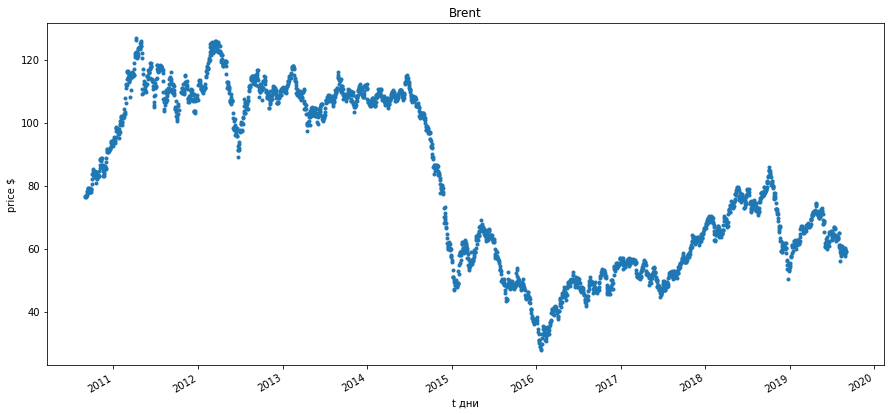

In [17]:
df['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent')
plt.ylabel('price $')
plt.xlabel('t дни')

### Обсуждение визуализации

* На графике пропусков также не наблюдается
* Визуальный анализ показывает что:
    * Предъявленные **данные НЕ имеют циклов**

Создаём недельный тайм-фрейм с усреднением цен внутри этого периода

In [18]:
week_df = df.copy()
week_df = week_df.resample("W", label='left').mean()

In [19]:
week_df.head()

,Значение
Дата,
2010-08-29,76.616000
2010-09-05,77.673333
2010-09-12,78.693333
2010-09-19,78.518333
2010-09-26,81.211667


Создаём месячный тайм-фрейм с усреднением цен внутри этого периода:

In [20]:
month_df = df.copy()
month_df = month_df.resample('M', label='left').mean()
month_df.head()

,Значение
Дата,
2010-08-31,78.228148
2010-09-30,83.473462
2010-10-31,86.178077
2010-11-30,92.232308
2010-12-31,97.033200


### Задание 4

Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent

Это задание мне не совсем понятно, не могу понять, что требуется, поэтому сделаю так, как я это понял:

- посчитаю среднее за каждый период
- посчитаю отклонение от среднего и выведу это на график
- посчитаю среднее отклонение на усреднённом недельном (месячном, годовом) отрезке

В предыдущем задании у нас уже созданы недельный и месячный тайм-фрейм для котировок нефти, теперь надо создать ещё и годовой

In [21]:
year_df = df.copy()
year_df = year_df.resample('Y', label='left').mean()
year_df.head()

,Значение
Дата,
2009-12-31,84.963238
2010-12-31,110.758746
2011-12-31,111.377484
2012-12-31,108.137114
2013-12-31,99.435493


##### Построим графики усреднённых цен на периодах "неделя", "месяц", "год"

<function matplotlib.pyplot.show(*args, **kw)>

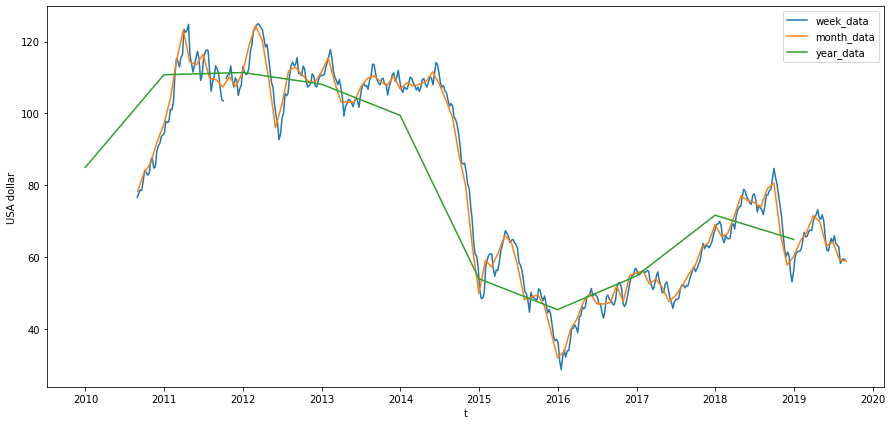

In [84]:
plt.figure( figsize=( 15, 7 ))

plt.plot(week_df.index,week_df['Значение'], label ='week_data')
plt.plot(month_df.index,month_df['Значение'], label ='month_data')
plt.plot(year_df.index,year_df['Значение'], label ='year_data')

plt.legend(['week_data', 'month_data', 'year_data'])

plt.ylabel('USA dollar')
plt.xlabel('t')

plt.show

Теперь добавим в датафрейм с ценами на нефть средние цены за выбранные периоды ("неделя", "месяц", "год"):

In [48]:
df['date']=df.index
df['week']=week_df.asfreq("D", method='pad')
df['month']=month_df.asfreq('D', method='pad')
df['year']=year_df.asfreq('D', method='pad')

Добавим новые столбцы времени: день недели, день месяца, день года

In [50]:
df['dayofmonth'] = df['date'].dt.day
df['dayofyear'] = df['date'].dt.dayofyear
df['dayofweek'] = df['date'].dt.dayofweek

Проверка на пропуски:

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2667 entries, 2010-09-01 to 2019-09-01
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Значение    2667 non-null   float64       
 1   date        2667 non-null   datetime64[ns]
 2   week        2660 non-null   float64       
 3   month       2666 non-null   float64       
 4   year        2460 non-null   float64       
 5   dayofmonth  2667 non-null   int64         
 6   dayofyear   2667 non-null   int64         
 7   dayofweek   2667 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 187.5 KB


Видно, что у нас остались NaN значения, заполним их вручную, я решил брать последние из рассчитанных средних:

In [73]:
df['week'] = df['week'].fillna(value=59.348333)
df['month']=df['month'].fillna(value=59.263077)
df['year']=df['year'].fillna(value=64.917633)

In [74]:
df.tail(10)

,Значение,date,week,month,year,dayofmonth,dayofyear,dayofweek
Дата,,,,,,,,
2019-08-21,60.38,2019-08-21,59.495000,59.263077,64.917633,21,233,2
2019-08-22,60.05,2019-08-22,59.495000,59.263077,64.917633,22,234,3
2019-08-23,58.94,2019-08-23,59.495000,59.263077,64.917633,23,235,4
2019-08-25,57.81,2019-08-25,59.348333,59.263077,64.917633,25,237,6
2019-08-26,58.26,2019-08-26,59.348333,59.263077,64.917633,26,238,0
2019-08-27,59.59,2019-08-27,59.348333,59.263077,64.917633,27,239,1
2019-08-28,59.84,2019-08-28,59.348333,59.263077,64.917633,28,240,2
2019-08-29,60.37,2019-08-29,59.348333,59.263077,64.917633,29,241,3
2019-08-30,59.19,2019-08-30,59.348333,59.263077,64.917633,30,242,4


Теперь рассчитаем отклонения от всех средних, для этого создадим новые столбцы в датафрейме:

In [75]:
df['week_delta']=df['Значение']-df['week']
df['month_delta']=df['Значение']-df['month']
df['year_delta']=df['Значение']-df['year']

Получилось очень информативно:

In [77]:
df.head()

,Значение,date,week,month,year,dayofmonth,dayofyear,dayofweek,week_delta,month_delta,year_delta
Дата,,,,,,,,,,,
2010-09-01,76.37,2010-09-01,76.616000,78.228148,84.963238,1,244,2,-0.246000,-1.858148,-8.593238
2010-09-02,76.89,2010-09-02,76.616000,78.228148,84.963238,2,245,3,0.274000,-1.338148,-8.073238
2010-09-03,76.57,2010-09-03,76.616000,78.228148,84.963238,3,246,4,-0.046000,-1.658148,-8.393238
2010-09-04,76.62,2010-09-04,76.616000,78.228148,84.963238,4,247,5,0.004000,-1.608148,-8.343238
2010-09-05,76.63,2010-09-05,77.673333,78.228148,84.963238,5,248,6,-1.043333,-1.598148,-8.333238


На графике красота:

<function matplotlib.pyplot.show(*args, **kw)>

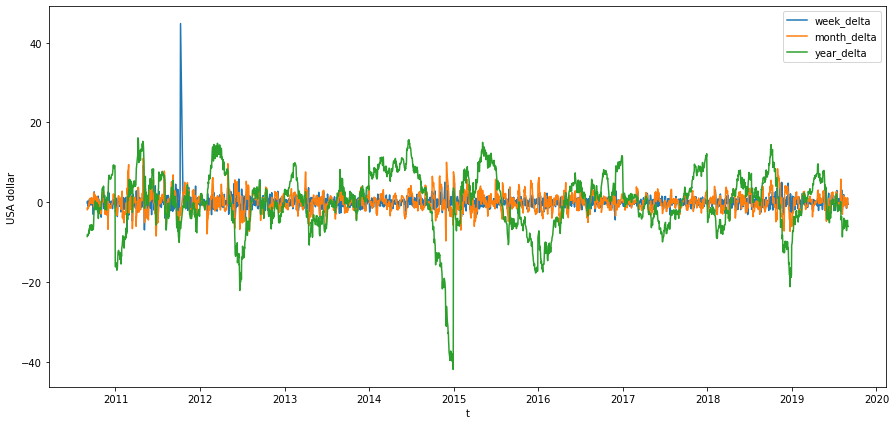

In [83]:
plt.figure( figsize=( 15, 7 ))

plt.plot(df.index,df['week_delta'])
plt.plot(df.index,df['month_delta'])
plt.plot(df.index,df['year_delta'])
plt.legend(['week_delta', 'month_delta', 'year_delta'])

plt.ylabel('USA dollar')
plt.xlabel('t')

plt.show

На таком графике при желании можно даже попытаться поискать цикличности! Плюс есть подозрение неполадку в данных из-за большого синего "шпиля"

Теперь я хочу увидеть усреднённую динамику внутри каждого из периодов, для этого мне нужно сделать аналог сводной таблицы.

#### Усреднённые отклонения на недельном тайм-фрейме:

In [91]:
week_table = pd.pivot_table(df, values='week_delta', index=['dayofweek'], aggfunc=np.mean)
week_table

,week_delta
dayofweek,
0,0.001533
1,-0.036051
2,0.012652
3,-0.041162
4,0.067047
5,0.345333
6,0.175167


График:

<function matplotlib.pyplot.show(*args, **kw)>

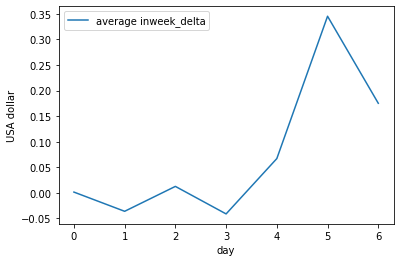

In [93]:
plt.plot(week_table.index,week_table['week_delta'])
plt.legend(['average inweek_delta'])

plt.ylabel('USA dollar')
plt.xlabel('day of week')

plt.show

В ходе анализа мы также натолкнулись на тот факт, что в **нашем датасете цены содержатся и для субботы, и для воскресенья**. Такое может происходить из-за того, что часто рабочие дни сдвигаются из-за праздников и т.д., но в любом случае это - повод проверить датасет на корректность значений

#### Усреднённые отклонения на месячном тайм-фрейме:

<function matplotlib.pyplot.show(*args, **kw)>

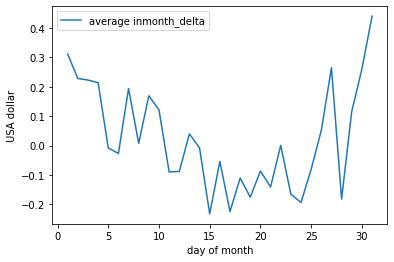

In [95]:
month_table = pd.pivot_table(df, values='month_delta', index=['dayofmonth'], aggfunc=np.mean)

plt.plot(month_table.index,month_table['month_delta'])
plt.legend(['average inmonth_delta'])

plt.ylabel('USA dollar')
plt.xlabel('day of month')

plt.show

#### Усреднённые отклонения на годовом тайм-фрейме:

<function matplotlib.pyplot.show(*args, **kw)>

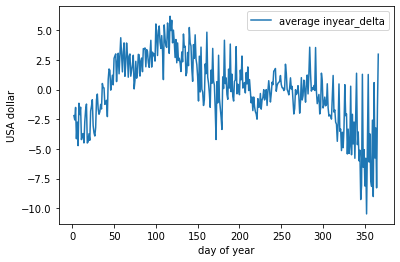

In [96]:
year_table = pd.pivot_table(df, values='year_delta', index=['dayofyear'], aggfunc=np.mean)

plt.plot(year_table.index,year_table['year_delta'])
plt.legend(['average inyear_delta'])

plt.ylabel('USA dollar')
plt.xlabel('day of year')

plt.show

Однако, во всех этих исследованиях есть изъян, т.к. при измерении отклонений в абсолютном выражении, мы рискуем получить неверные данные. Например, когда цены на нефть находятся в районе 100 долларов, колебание на +/-20 долларов означает колебание на +/-20%, а когда цена на нефть 40 долларов за баррель, отклонения на 20 долларов означают отклонения на 50%, поэтому в серьёзном подходе данные нужно будет на что-нибудь нормировать (нормализовывать, стандартизировать или нормировать на волатильность)

### Задание 5

Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.

Выводы:
* усреднение данных помогает увидеть тренды, уменьшить влияние кратковременных изменений, взглянуть на тенденции более общего порядка
* цена менее волатильна (изменчива) на графиках более крупного масштаба
* в то же время цена может намного более амплитудно "гулять" от годового среднего, чем от недельного, что показали дополнительные графики. Это логично, ведь вероятность большого изменения цены на интервале год намного выше, чем на интервале одной недели
* несмотря на априорность отсутствия цикличности или сезонности в такого рода данных, я всё-таки склонен считать, что это всё-таки есть. Например, на графике усреднённых внутри-недельных отклонений, мы можем видеть, что цена на нефть имеет склонность расти по пятницам и субботам. 

На внутримесячном графике мы можем видеть внутримесячный "U"-образный сезонный цикл отклонения цен от средней (тут, конечно, есть изъян, что средняя по периоду меняется с каждым днём и внутри периода это даст нам мало практической пользы). 

На годовом графике можно было бы при желании рассмотреть сезонный цикл с повышением цен к 100му порядковому дню года и с их понижением к концу года

Также можно было бы создать синтетические данные и попытаться найти цикличность и в них (например, отношение текущей цены к максимальной цене по данному периоду, кол-во дней с достижения последнего максимума-минимума цены, кол-во подряд растущих или падающих дней или любые другие их комбинации и т.д.)